In [1]:
import xarray as xr
import numpy as np

In [2]:
from PMMPIESM.setup import _get_path

In [3]:
ds = xr.open_dataset(_get_path('tos',prefix='ds')).rename({'ensemble':'initialization'})
control = xr.open_dataset(_get_path('tos',prefix='control')).rename({'time':'initialization'})

In [4]:
ds

<xarray.Dataset>
Dimensions:         (initialization: 12, member: 10, time: 21, x: 256, y: 220)
Coordinates:
    lon             (y, x) float64 ...
    lat             (y, x) float64 ...
  * member          (member) int64 0 1 2 3 4 5 6 7 8 9
  * initialization  (initialization) int64 3014 3023 3045 ... 3228 3237 3257
  * time            (time) int64 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21
Dimensions without coordinates: x, y
Data variables:
    tos             (time, initialization, member, y, x) float32 ...

In [5]:
control

<xarray.Dataset>
Dimensions:         (initialization: 301, x: 256, y: 220)
Coordinates:
    lon             (y, x) float64 ...
    lat             (y, x) float64 ...
  * initialization  (initialization) int64 3000 3001 3002 ... 3298 3299 3300
Dimensions without coordinates: x, y
Data variables:
    tos             (initialization, y, x) float32 ...

In [6]:
from climpred.relative_entropy import compute_relative_entropy, bootstrap_relative_entropy
from climpred.graphics import plot_relative_entropy

# test PM

In [7]:
#print(ds,'\n')
#print(control)
rel_ent = compute_relative_entropy(ds, control,nmember_control=100,neofs=8)

/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/climpred-0.2-py3.6.egg/climpred/relative_entropy.py:161: UserWarning: Warning: initialized and control_uninitialized have different coords.
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/climpred-0.2-py3.6.egg/climpred/relative_entropy.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [8]:
rel_ent.to_dataframe().unstack(0).head()#.plot()

R                                                       \
initialization      3014      3023       3045      3061       3124       3139   
time                                                                            
1               9.693557  7.333959  13.044954  9.065317  11.353503  12.408813   
2               7.977702  4.991472   7.814409  5.357708   7.762092   9.642718   
3               6.039488  6.001339   7.369810  4.861310   8.193705   5.714853   
4               6.851453  4.726625   6.629907  5.167230   7.199132   7.720844   
5               6.501794  5.369520   6.118737  3.405520   7.285252   3.574042   

                                                              ...     \
initialization       3144       3175       3178       3228    ...      
time                                                          ...      
1               12.439071  10.352486  10.429911  12.683270    ...      
2                8.359315   6.352693   5.608189   7.578449    ...      
3                6.179713   6.356922   8.511482   8.496151    ...      
4                6.622515   6.645537   4.789322   6.544222    ...      
5                5.726815   3.617032   4.734201   4.255144    ...      

                       D                                                    \
initialization      3045      3061      3124      3139      3144      3175   
time                                                                         
1               7.663389  7.787483  8.454193  7.549662  7.127733  8.302323   
2               5.084003  4.464486  4.801991  4.479207  4.945194  5.362164   
3               6.055880  3.793045  4.962090  3.518235  3.845111  5.459461   
4               5.211236  4.502111  4.236659  6.240183  5.027351  6.048322   
5               5.206313  3.145806  4.628047  2.670917  4.657497  2.893464   

                                                        
initialization      3178      3228      3237      3257  
time                                                    
1               8.683306  8.713561  7.627569  5.857889  
2               4.524187  3.863692  4.312113  5.109073  
3               7.782598  5.131155  5.191338  3.375988  
4               4.516948  3.465077  3.439104  5.065496  
5               4.206014  2.510204  3.866530  4.514619  

[5 rows x 36 columns]

In [8]:
rel_ent_threshold = bootstrap_relative_entropy(ds, control, sig=50,
                               bootstrap=50, curv=True, neofs=8,
                               nmember_control=100)

/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/climpred-0.2-py3.6.egg/climpred/relative_entropy.py:161: UserWarning: Warning: initialized and control_uninitialized have different coords.
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/climpred-0.2-py3.6.egg/climpred/relative_entropy.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


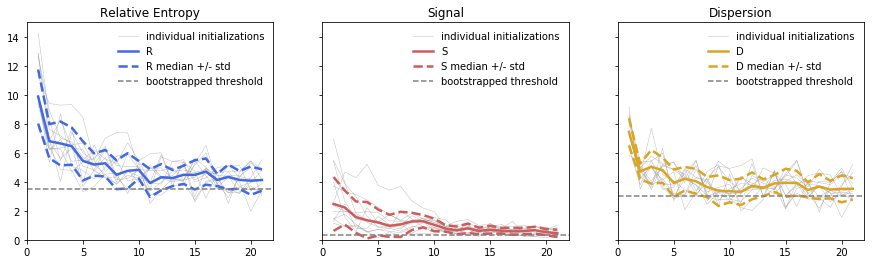

In [9]:
plot_relative_entropy(rel_ent, rel_ent_threshold=rel_ent_threshold, sharey=True, figsize=(15,4))

# test DPLE, LENS
faking data with DPLE, LENS coords

In [14]:
lens = xr.concat([control]*10,dim='member').rename({'initialization':'time'}).isel(time=slice(0,65)).assign(time=np.arange(1950,2015))
lens = lens.assign(member=np.arange(lens.member.size))
print(lens)

<xarray.Dataset>
Dimensions:  (member: 10, time: 65, x: 256, y: 220)
Coordinates:
    lon      (y, x) float64 -47.25 -47.69 -48.12 -48.54 ... 131.3 132.5 133.8
    lat      (y, x) float64 76.36 76.3 76.24 76.17 ... -77.25 -77.39 -77.54
  * time     (time) int64 1950 1951 1952 1953 1954 ... 2010 2011 2012 2013 2014
  * member   (member) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: x, y
Data variables:
    tos      (member, time, y, x) float32 nan nan nan nan ... nan nan nan nan


In [17]:
from climpred.relative_entropy import _shuffle

In [18]:
#from climpred.relative_entropy import _shuffle
lens = xr.concat([_shuffle(control,'initialization') for _ in range(10)],dim='member').rename({'initialization':'time'}).isel(time=slice(0,65)).assign(time=np.arange(1950,2015))
lens = lens.assign(member=np.arange(lens.member.size))
print(lens)

<xarray.Dataset>
Dimensions:  (member: 10, time: 65, x: 256, y: 220)
Coordinates:
    lon      (y, x) float64 -47.25 -47.69 -48.12 -48.54 ... 131.3 132.5 133.8
    lat      (y, x) float64 76.36 76.3 76.24 76.17 ... -77.25 -77.39 -77.54
  * time     (time) int64 1950 1951 1952 1953 1954 ... 2010 2011 2012 2013 2014
  * member   (member) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: x, y
Data variables:
    tos      (member, time, y, x) float32 nan nan nan nan ... nan nan nan nan


In [19]:
dple = xr.concat([ds]*6,'initialization').isel(initialization=slice(0,65)).isel(time=slice(0,5))
dple = dple.assign(initialization=lens.time.values)
print(dple)

<xarray.Dataset>
Dimensions:         (initialization: 65, member: 10, time: 5, x: 256, y: 220)
Coordinates:
    lon             (y, x) float64 -47.25 -47.69 -48.12 ... 131.3 132.5 133.8
    lat             (y, x) float64 76.36 76.3 76.24 ... -77.25 -77.39 -77.54
  * member          (member) int64 0 1 2 3 4 5 6 7 8 9
  * time            (time) int64 1 2 3 4 5
  * initialization  (initialization) int64 1950 1951 1952 ... 2012 2013 2014
Dimensions without coordinates: x, y
Data variables:
    tos             (time, initialization, member, y, x) float32 nan nan ... nan


In [20]:
#_bootstrap_dim(lens, dple.time.size,time_dim='time',dim='initialization',dim_label=list(dple.initialization.values))

In [21]:
#print(dple)
#print(lens)
compute_relative_entropy(dple, lens,ntime=4,nmember_control=5,neofs=3)#.head()

/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/climpred-0.2-py3.6.egg/climpred/relative_entropy.py:161: UserWarning: Warning: initialized and control_uninitialized have different coords.
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


('time', 'initialization', 'member', 'y', 'x')
('initialization', 'member', 'time', 'y', 'x')


/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/climpred-0.2-py3.6.egg/climpred/relative_entropy.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<xarray.Dataset>
Dimensions:         (initialization: 65, time: 4)
Coordinates:
  * initialization  (initialization) int64 1950 1951 1952 ... 2012 2013 2014
  * time            (time) int64 1 2 3 4
Data variables:
    R               (initialization, time) float64 1.672 1.194 ... 2.289 14.57
    S               (initialization, time) float64 1.063 0.7667 ... 1.583 13.55
    D               (initialization, time) float64 0.6097 0.4269 ... 1.023

# Understand nmember_control


 5
Frozen(SortedKeysDict(OrderedDict([('initialization', 12), ('member', 10), ('time', 21), ('x', 256), ('y', 220)])))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 5, 'initialization': 12}))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict(OrderedDict([('initialization', 301), ('x', 256), ('y', 220)])))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 5, 'initialization': 12}))


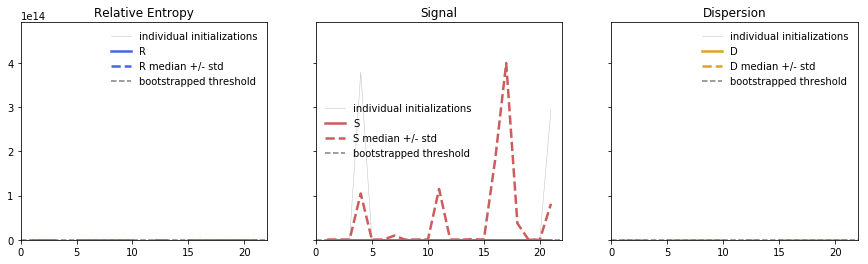


 10
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict(OrderedDict([('initialization', 301), ('x', 256), ('y', 220)])))


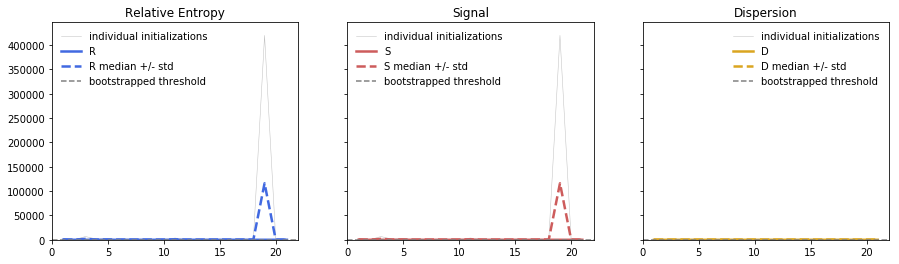


 20
Frozen(SortedKeysDict(OrderedDict([('initialization', 12), ('member', 10), ('time', 21), ('x', 256), ('y', 220)])))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 20, 'initialization': 12}))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict(OrderedDict([('initialization', 301), ('x', 256), ('y', 220)])))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 20, 'initialization': 12}))


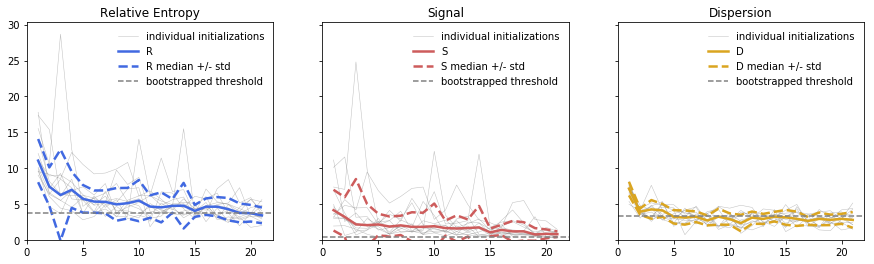


 50
Frozen(SortedKeysDict(OrderedDict([('initialization', 12), ('member', 10), ('time', 21), ('x', 256), ('y', 220)])))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 50, 'initialization': 12}))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict(OrderedDict([('initialization', 301), ('x', 256), ('y', 220)])))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 50, 'initialization': 12}))


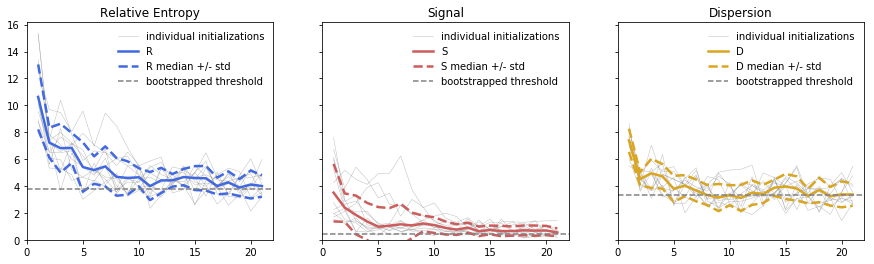


 100
Frozen(SortedKeysDict(OrderedDict([('initialization', 12), ('member', 10), ('time', 21), ('x', 256), ('y', 220)])))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 100, 'initialization': 12}))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict(OrderedDict([('initialization', 301), ('x', 256), ('y', 220)])))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 10, 'initialization': 12}))
Frozen(SortedKeysDict({'y': 220, 'x': 256, 'time': 21, 'member': 100, 'initialization': 12}))


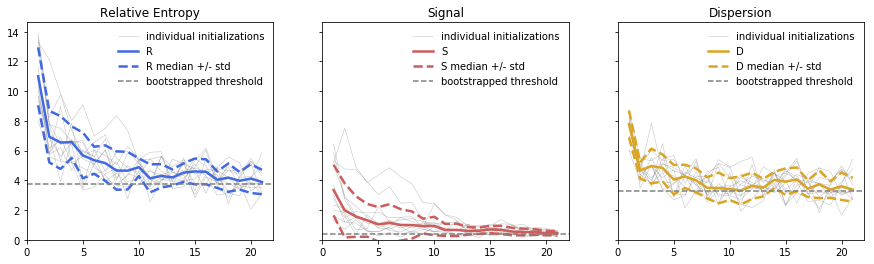

In [28]:
import warnings
warnings.filterwarnings("ignore")
neofs=8
for i in [5,10,20,50,100]:
    print('\n',i)
    rel_ent = compute_relative_entropy(ds, control,nmember_control=i,neofs=neofs)
    el_ent_threshold = bootstrap_relative_entropy(ds, control, sig=50,
                               bootstrap=50, curv=True, neofs=neofs,
                               nmember_control=i)
    plot_relative_entropy(rel_ent, rel_ent_threshold=rel_ent_threshold, sharey=True, figsize=(15,4))
    plt.show()